**Milestone 3 : EDA**

Step1: Advance EDA 

Once the dataset is loaded and validated, the next step is to perform advanced exploratory data analysis (EDA).
This phase aims to uncover hidden patterns, detect anomalies, and evaluate the overall quality of the data before proceeding to feature engineering and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv("dynamic_pricing.csv")
#Advanced EDA
# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Descriptive stats
print("\nDescriptive Stats:\n", df.describe())

numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

print("Numerical Columns:", numerical_columns.tolist())
print("Categorical Columns:", categorical_columns.tolist())


Missing Values:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Number of duplicate rows: 0

Descriptive Stats:
        Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_R

Step2: Outlier Detection

Outliers are extreme values that lie far from most of the data. They can skew results and affect the performance of ML models, especially regression.

2.1 Using Boxplot

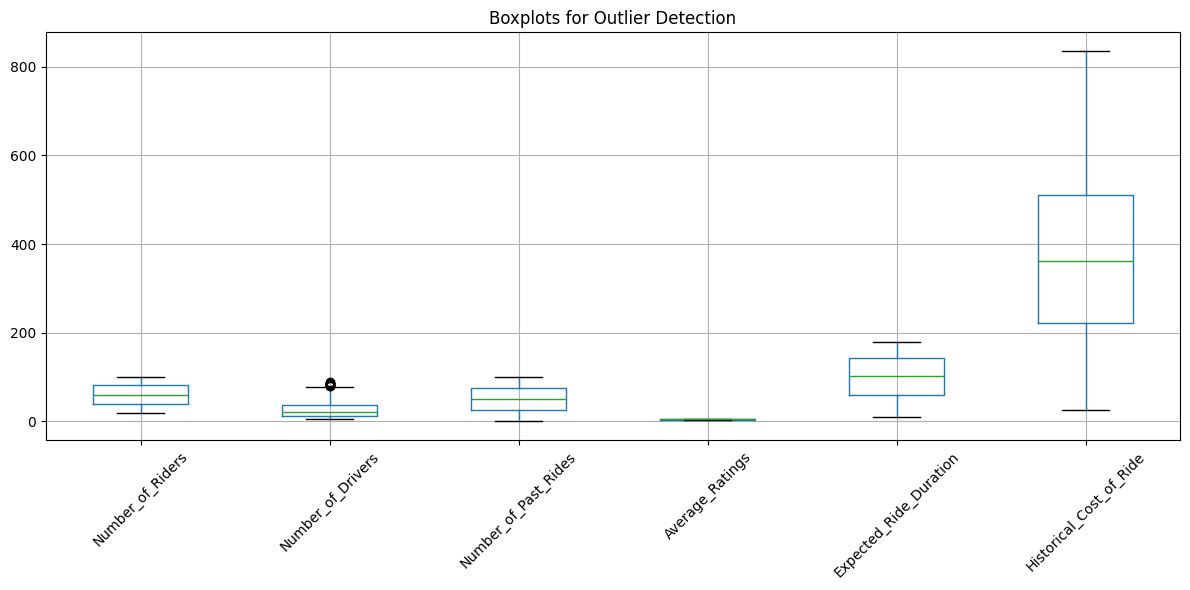

In [2]:
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()

2.2 Using IQR method

In [3]:
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers[col] = outlier_indices

# Summary
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outliers")


Number_of_Riders: 0 outliers
Number_of_Drivers: 10 outliers
Number_of_Past_Rides: 0 outliers
Average_Ratings: 0 outliers
Expected_Ride_Duration: 0 outliers
Historical_Cost_of_Ride: 0 outliers


Step 3: Linearity Check (Numerical vs Target)

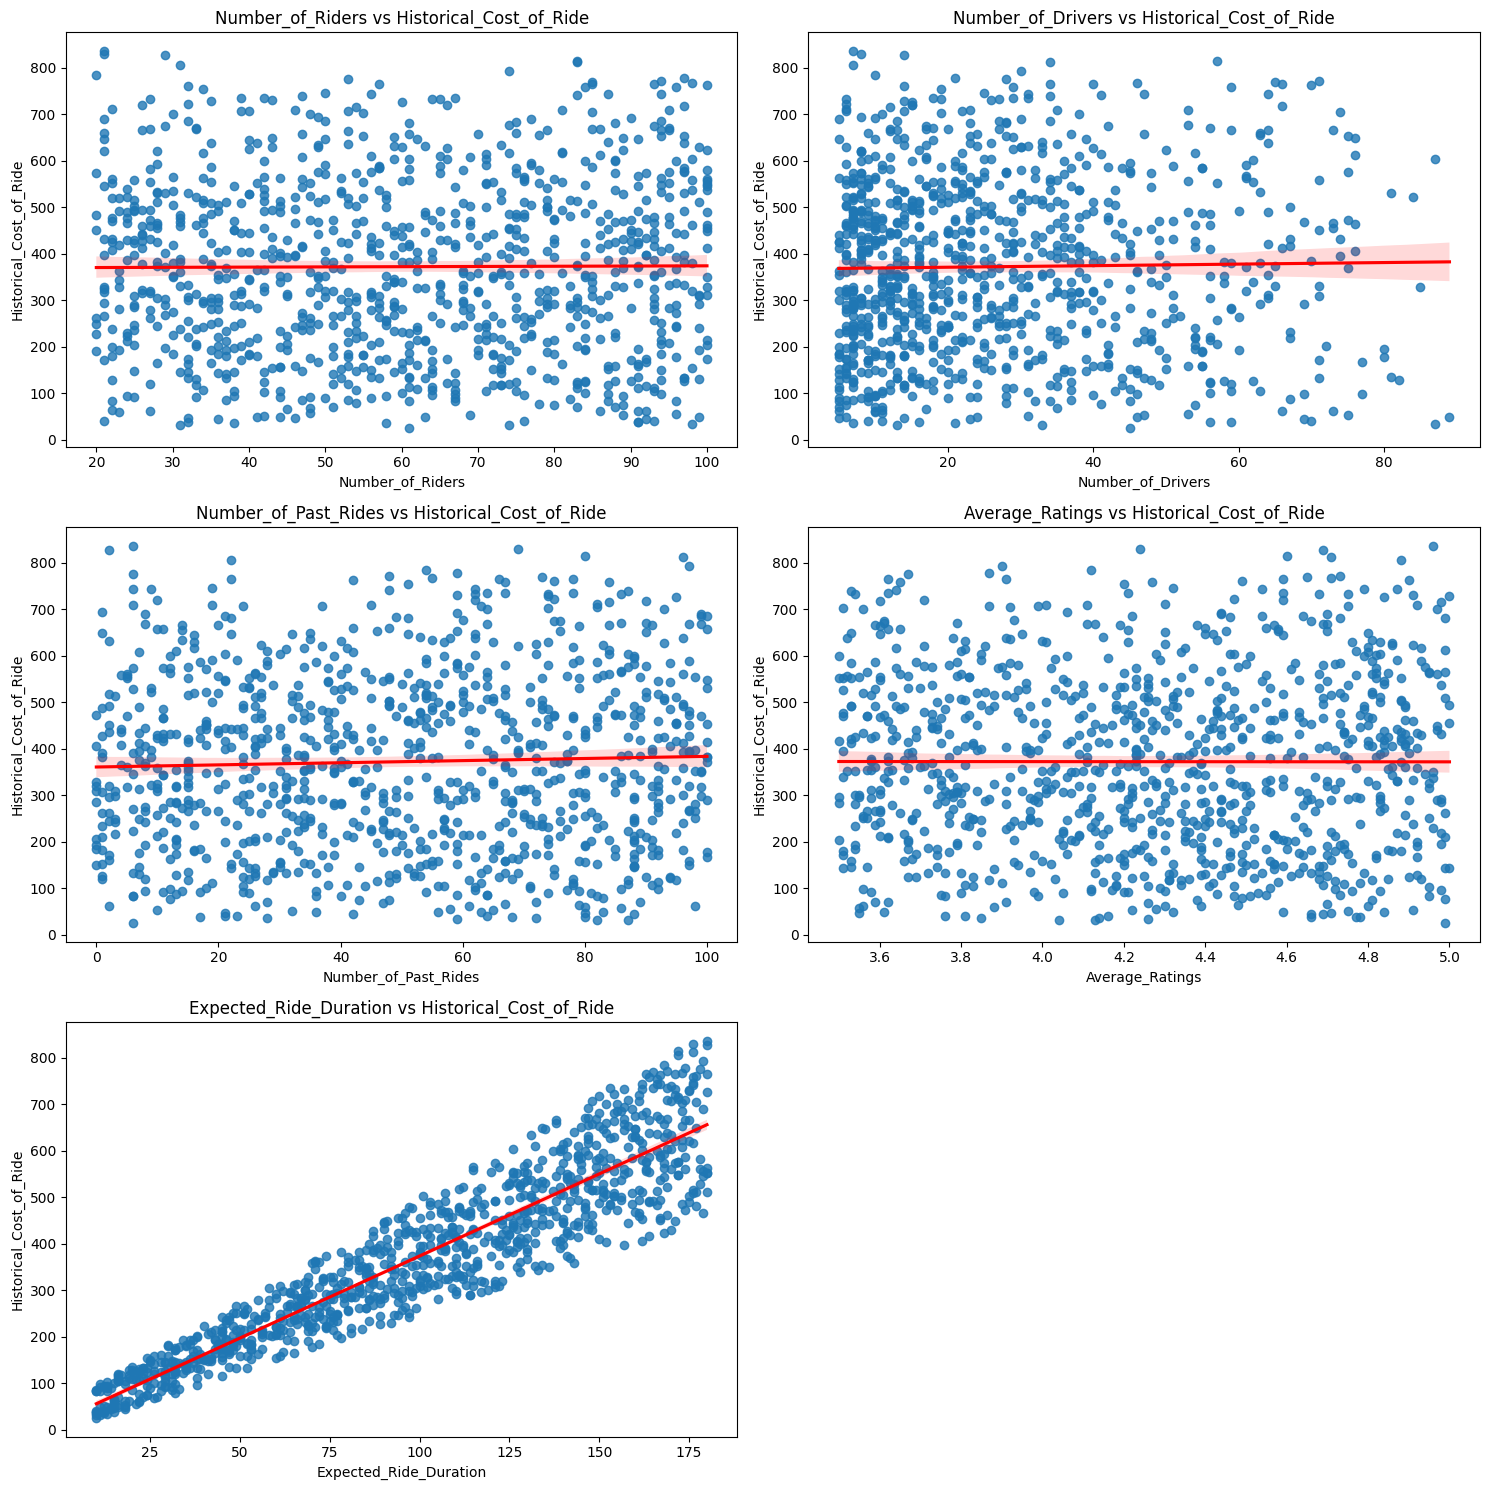

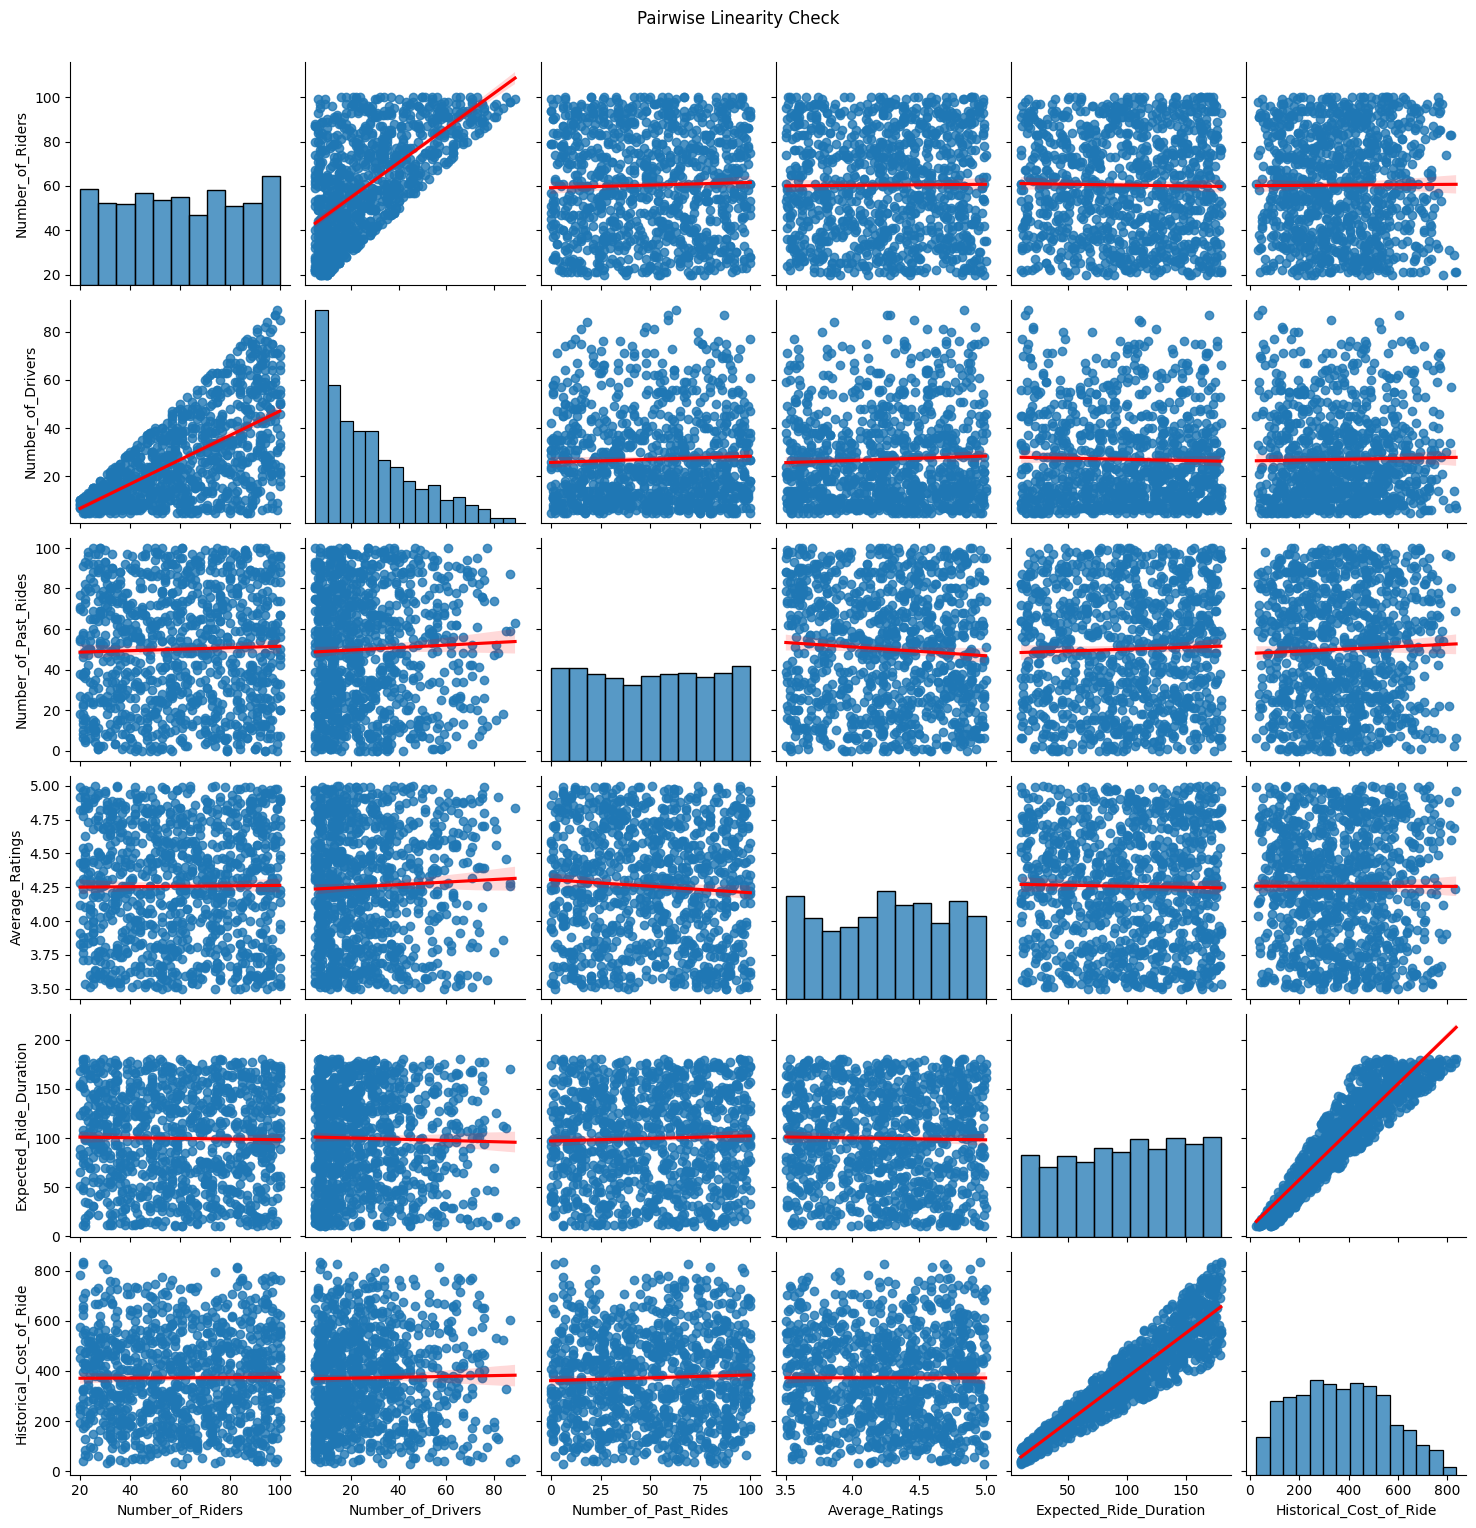

In [4]:
target_col = "Historical_Cost_of_Ride"
num_cols_excl_target = numerical_columns.drop(target_col)

# Scatter plots with regression line
n_cols = 2
n_rows = (len(num_cols_excl_target) + 1) // n_cols
plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(num_cols_excl_target, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.regplot(x=df[col], y=df[target_col], line_kws={"color": "red"})
    plt.title(f"{col} vs {target_col}")

plt.tight_layout()
plt.show()

# Pairplot for overall linearity
sns.pairplot(df[num_cols_excl_target.tolist() + [target_col]], kind="reg",
             plot_kws={'line_kws': {'color': 'red'}})
plt.suptitle("Pairwise Linearity Check", y=1.02)
plt.show()


Step4: Handle Categorical Variables(Endcoding)

In [5]:
# Identify categorical columns again
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Apply One-Hot Encoding (for nominal categories like Vehicle_Type)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.head()

Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,13,4.47,90,284.257273,False,True,False,True,False,False,True,True
1,58,39,72,4.06,43,173.874753,True,False,False,True,True,False,False,False
2,42,31,0,3.99,76,329.795469,False,False,False,True,False,False,False,True
3,89,28,67,4.31,134,470.201232,False,False,True,False,False,False,False,True
4,78,22,74,3.77,149,579.681422,False,False,True,False,False,False,False,False


In [6]:
#If categories are ordinal (like Loyalty_Status: Bronze < Silver < Gold), use Label Encoding instead
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Customer_Loyalty_Status'] = le.fit_transform(df['Customer_Loyalty_Status'])

Step5: Summary Statistics

In [7]:
# Summary stats for numerical features
print(df.describe())

# Summary stats for categorical features
print(df.describe(include=['object']))

       Number_of_Riders  Number_of_Drivers  Customer_Loyalty_Status  \
count       1000.000000        1000.000000              1000.000000   
mean          60.372000          27.076000                 1.054000   
std           23.701506          19.068346                 0.823263   
min           20.000000           5.000000                 0.000000   
25%           40.000000          11.000000                 0.000000   
50%           60.000000          22.000000                 1.000000   
75%           81.000000          38.000000                 2.000000   
max          100.000000          89.000000                 2.000000   

       Number_of_Past_Rides  Average_Ratings  Expected_Ride_Duration  \
count           1000.000000      1000.000000              1000.00000   
mean              50.031000         4.257220                99.58800   
std               29.313774         0.435781                49.16545   
min                0.000000         3.500000                10.00000   


Step6: Correlations

In [8]:
# Correlation matrix for numerical variables
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

# Sort correlations with target
target_col = "Historical_Cost_of_Ride"
print(corr_matrix[target_col].sort_values(ascending=False))

                         Number_of_Riders  Number_of_Drivers  \
Number_of_Riders                 1.000000           0.627016   
Number_of_Drivers                0.627016           1.000000   
Customer_Loyalty_Status          0.002304          -0.012505   
Number_of_Past_Rides             0.029265           0.039660   
Average_Ratings                  0.008572           0.041204   
Expected_Ride_Duration          -0.015856          -0.024418   
Historical_Cost_of_Ride          0.005826           0.017082   

                         Customer_Loyalty_Status  Number_of_Past_Rides  \
Number_of_Riders                        0.002304              0.029265   
Number_of_Drivers                      -0.012505              0.039660   
Customer_Loyalty_Status                 1.000000              0.035519   
Number_of_Past_Rides                    0.035519              1.000000   
Average_Ratings                         0.067968             -0.064734   
Expected_Ride_Duration                 -0.0

Step7: Price vs Ride using Scatterplot

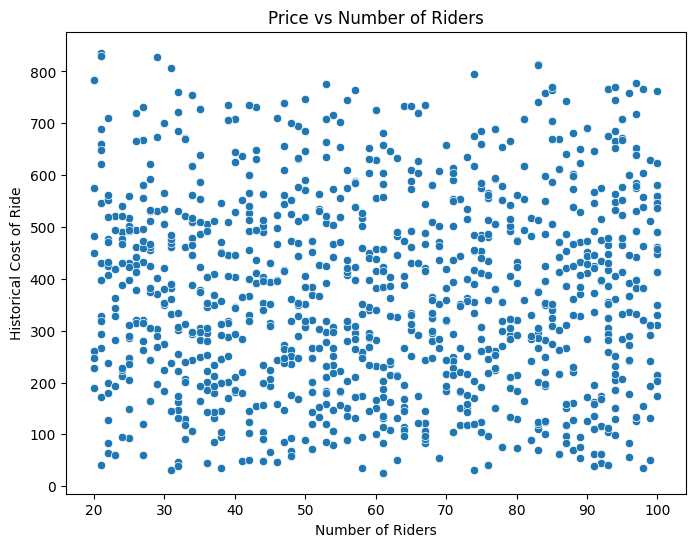

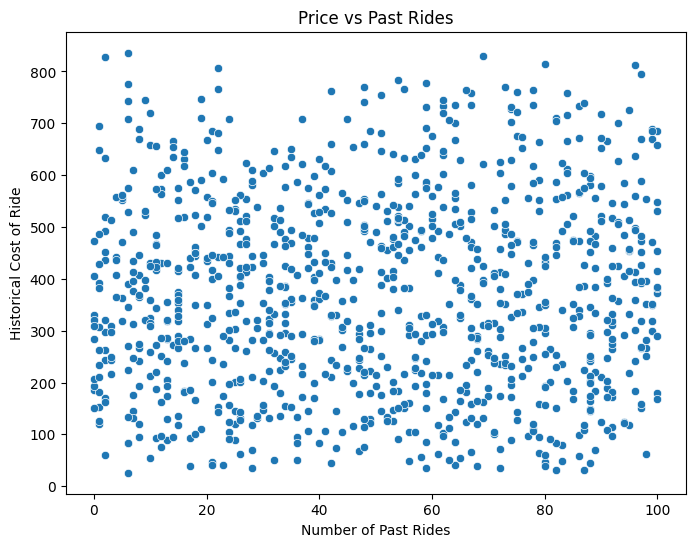

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Number_of_Riders'], y=df['Historical_Cost_of_Ride'])
plt.title("Price vs Number of Riders")
plt.xlabel("Number of Riders")
plt.ylabel("Historical Cost of Ride")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Number_of_Past_Rides'], y=df['Historical_Cost_of_Ride'])
plt.title("Price vs Past Rides")
plt.xlabel("Number of Past Rides")
plt.ylabel("Historical Cost of Ride")
plt.show()

Step8: Other EDA

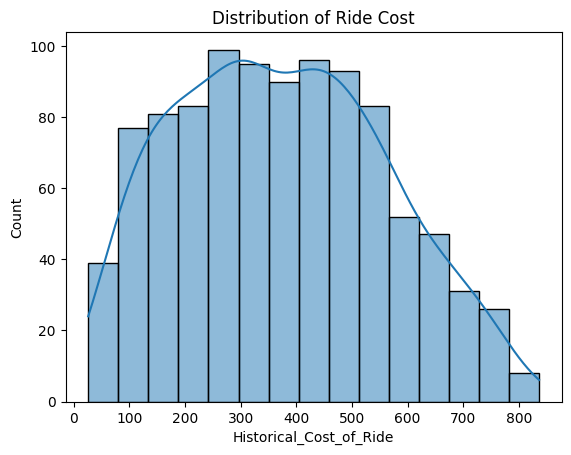

In [10]:
sns.histplot(df['Historical_Cost_of_Ride'], kde=True)
plt.title("Distribution of Ride Cost")
plt.show()


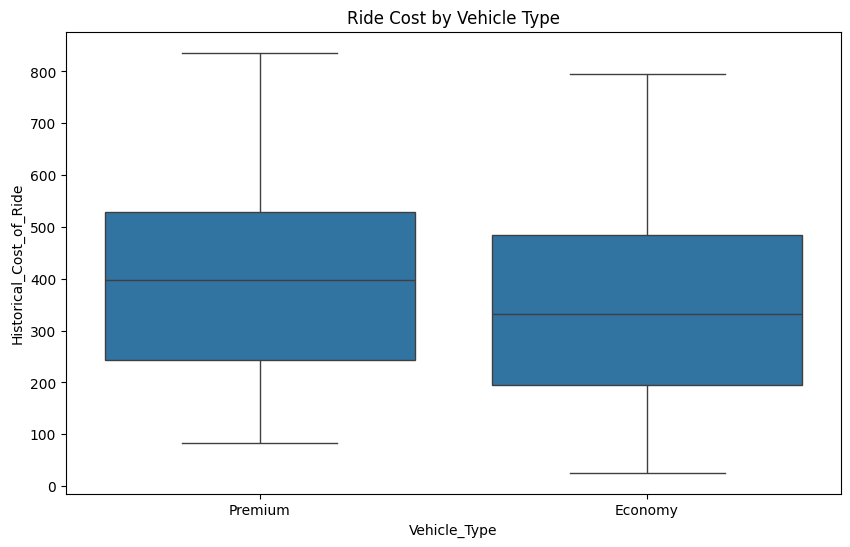

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Vehicle_Type", y="Historical_Cost_of_Ride", data=df)
plt.title("Ride Cost by Vehicle Type")
plt.show()


In [12]:
pd.crosstab(df['Location_Category'], df['Vehicle_Type'])

Vehicle_Type,Economy,Premium
Location_Category,,
Rural,153,179
Suburban,158,164
Urban,167,179


Step9: Segmentation(GroupBy Analysis)

In [13]:
# Average ride cost by Customer Loyalty
loyalty_seg = df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].mean()
print("\nAverage ride cost by Loyalty Status:")
print(loyalty_seg)

# Average ride cost by Location
location_seg = df.groupby("Location_Category")["Historical_Cost_of_Ride"].mean()
print("\nAverage ride cost by Location:")
print(location_seg)

# Average ride cost by Vehicle Type
vehicle_seg = df.groupby("Vehicle_Type")["Historical_Cost_of_Ride"].mean()
print("\nAverage ride cost by Vehicle Type:")
print(vehicle_seg)


Average ride cost by Loyalty Status:
Customer_Loyalty_Status
0    376.118746
1    380.125251
2    362.772140
Name: Historical_Cost_of_Ride, dtype: float64

Average ride cost by Location:
Location_Category
Rural       379.942172
Suburban    374.319486
Urban       363.673259
Name: Historical_Cost_of_Ride, dtype: float64

Average ride cost by Vehicle Type:
Vehicle_Type
Economy    346.573399
Premium    396.246242
Name: Historical_Cost_of_Ride, dtype: float64


Step10: Scatter Plot (Ride vs Price)

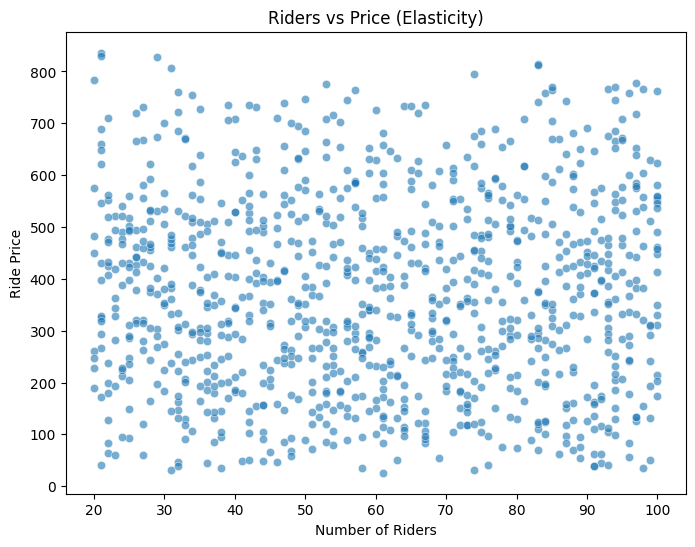

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Number_of_Riders", y="Historical_Cost_of_Ride", data=df, alpha=0.6)
plt.title("Riders vs Price (Elasticity)")
plt.xlabel("Number of Riders")
plt.ylabel("Ride Price")
plt.show()

Step11: Box plot by location (Cost distribution)

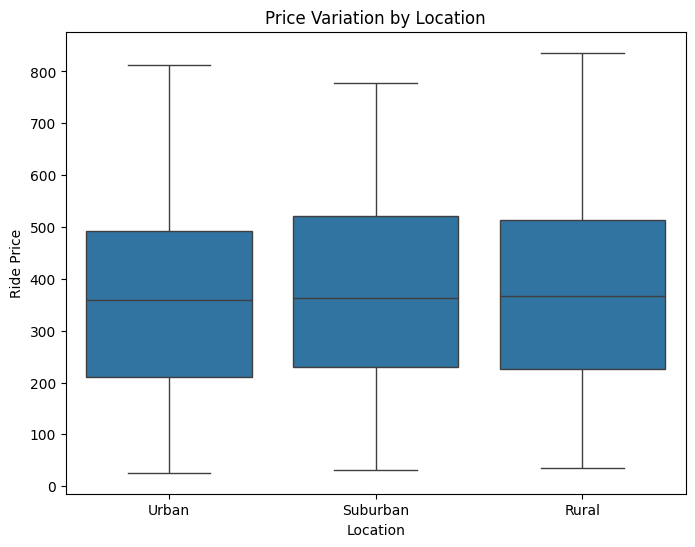

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Location_Category", y="Historical_Cost_of_Ride", data=df)
plt.title("Price Variation by Location")
plt.xlabel("Location")
plt.ylabel("Ride Price")
plt.show()


Step12: Save cleaned dataset

In [16]:
# Save cleaned/encoded dataset
df_encoded.to_csv("cleaned_csv_dataset.csv", index=False)
print("Cleaned dataset saved as cleaned_csv_dataset.csv")

Cleaned dataset saved as cleaned_csv_dataset.csv


Step 13: KPI Calculation (Revenue Lift, Profit Margin, Conversion Rate)

Objective

To evaluate the financial performance of the dynamic pricing model by tracking key business metrics — Revenue Lift, Profit Margin, and Conversion Rate.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
#KPIs for Revenue lift, Profit Margin, Conversion Rate, reflecting the outcome of the dynamic pricing model 
# Load cleaned data
df = pd.read_csv("cleaned_csv_data.csv")

# ✅ Ensure key column exists
if "Historical_Cost_of_Ride" in df.columns:

    # 1 Revenue (using historical cost as proxy for ride price)
    df["revenue"] = df["Historical_Cost_of_Ride"]

    # 2 Profit and Profit Margin (assuming 30% profit)
    df["profit"] = df["revenue"] * 0.3
    df["profit_margin"] = (df["profit"] / df["revenue"]) * 100

    # 3 Conversion Rate (simulate if not available)
    if "Booking_Confirmed" not in df.columns:
        np.random.seed(42)
        df["Booking_Confirmed"] = np.random.choice([0, 1], size=len(df))
    df["conversion_rate"] = (df["Booking_Confirmed"].rolling(50, min_periods=1).mean()) * 100  # rolling avg for smoother trend

    # 4 Revenue Lift (% change compared to average baseline)
    base_revenue = df["revenue"].mean()
    df["revenue_lift_pct"] = ((df["revenue"] - base_revenue) / base_revenue) * 100

    # 📊 Summary Metrics
    avg_revenue_lift = df["revenue_lift_pct"].mean()
    avg_profit_margin = df["profit_margin"].mean()
    overall_conversion_rate = (df["Booking_Confirmed"].sum() / len(df)) * 100

    print("\n========= KPI Summary =========")
    print(f"📊 Average Revenue Lift: {avg_revenue_lift:.2f}%")
    print(f"💰 Average Profit Margin: {avg_profit_margin:.2f}%")
    print(f"✅ Conversion Rate: {overall_conversion_rate:.2f}%")
    print("================================\n")

    # Show sample KPI table
    kpi_summary = df[["revenue", "profit_margin", "conversion_rate", "revenue_lift_pct"]]
    print(kpi_summary.head())

else:
    print("❌ Column 'Historical_Cost_of_Ride' not found in dataset.")


========= KPI Summary =========
📊 Average Revenue Lift: -0.00%
💰 Average Profit Margin: 30.00%
✅ Conversion Rate: 51.00%

      revenue  profit_margin  conversion_rate  revenue_lift_pct
0  284.257273           30.0         0.000000        -23.689860
1  173.874753           30.0        50.000000        -53.322543
2  329.795469           30.0        33.333333        -11.464927
3  470.201232           30.0        25.000000         26.227630
4  579.681422           30.0        20.000000         55.618078
